In [2]:
import warnings
import dreamerv3
from dreamerv3 import embodied
warnings.filterwarnings('ignore', '.*truncated to dtype int32.*')

print("Reading config", flush =True)

# See configs.yaml for all options.
config = embodied.Config(dreamerv3.configs['defaults'])
config = config.update(dreamerv3.configs['medium'])
config = config.update({
  'logdir': '~/PhD_projects2/dreamer_flows/dreamer/logdir/notebook_test_ks',
  'run.train_ratio': 64,
  'run.log_every': 30,  # seconds
  'batch_size': 16,
  'jax.prealloc': False,
  'encoder.mlp_keys': 'vector',
  'decoder.mlp_keys': 'vector',
  'encoder.cnn_keys': '$^',
  'decoder.cnn_keys': '$^',
  'jax.platform': 'cpu',
  'wrapper.length': 0,
})
# config = embodied.Flags(config).parse()

logdir = embodied.Path(config.logdir)
step = embodied.Counter()
logger = embodied.Logger(step, [
  embodied.logger.TerminalOutput(),
  embodied.logger.JSONLOutput(logdir, 'metrics.jsonl'),
  embodied.logger.TensorBoardOutput(logdir),
  # embodied.logger.WandBOutput(logdir.name, config),
  # embodied.logger.MLFlowOutput(logdir.name),
])



Reading config


In [ ]:
import gym
# from embodied.envs import from_gym

from ks.KS_environment import KSenv
import numpy as np

env = KSenv(nu=0.08,
          actuator_locs=np.linspace(0.2, 2 * np.pi - 0.2, 7),#np.array([0.0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]),
          # sensor_locs=np.array([0, 2 * np.pi, 64]),
          burn_in=100)

In [22]:
obs_ = env.reset()[np.newaxis,:]
# print('hi')

for i in range(100):
    new_obs = env.step(action = np.zeros(7))[0]
#     print(new_obs)
    obs_ = np.concatenate((obs_, new_obs[np.newaxis,:]), axis = 0)

obs_.shape

(101, 64)

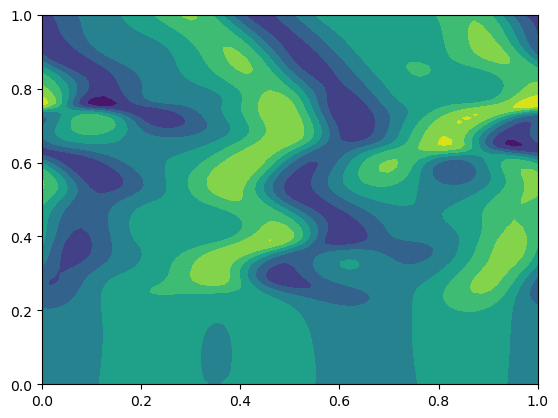

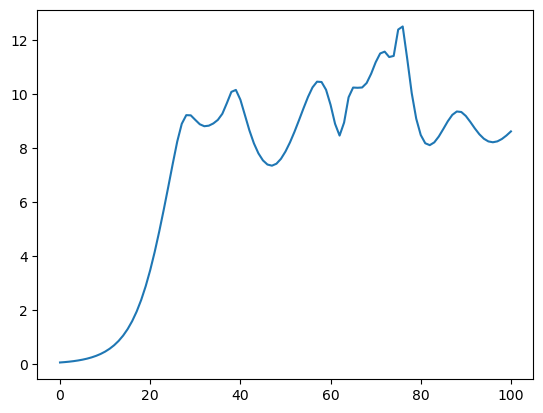

In [24]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 64)
y = np.linspace(0, 1, 101)
X, Y = np.meshgrid(x, y)

plt.figure()
plt.contourf(x,y,obs_)

plt.figure()
plt.plot(np.linalg.norm(obs_, axis = -1))

In [3]:
env = from_gym.FromGym(env, obs_key='vector')  # Or obs_key='vector'.
env = dreamerv3.wrap_env(env, config)
env = embodied.BatchEnv([env], parallel=False)

In [4]:
agent = dreamerv3.Agent(env.obs_space, env.act_space, step, config)
replay = embodied.replay.Uniform(
  config.batch_length, config.replay_size, logdir / 'replay')
args = embodied.Config(
  **config.run, logdir=config.logdir,
  batch_steps=config.batch_size * config.batch_length)


Encoder CNN shapes: {}
Encoder MLP shapes: {'vector': (64,)}
Decoder CNN shapes: {}
Decoder MLP shapes: {'vector': (64,)}
JAX devices (1): [CpuDevice(id=0)]
Policy devices: TFRT_CPU_0
Train devices:  TFRT_CPU_0
Tracing train function.
(16, 64, 1024)
(16, 64, 1024)
Optimizer model_opt has 24,130,496 variables.
Optimizer actor_opt has 2,142,734 variables.
Optimizer critic_opt has 2,297,215 variables.


In [15]:
i = next(replay.dataset())
print(replay.online)
i.keys()

False


dict_keys(['vector', 'reward', 'is_first', 'is_last', 'is_terminal', 'action', 'reset', 'id'])

In [21]:
print(np.min(i['action']))

-0.9980621


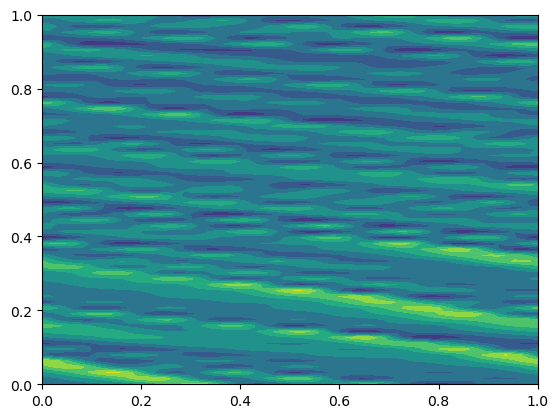

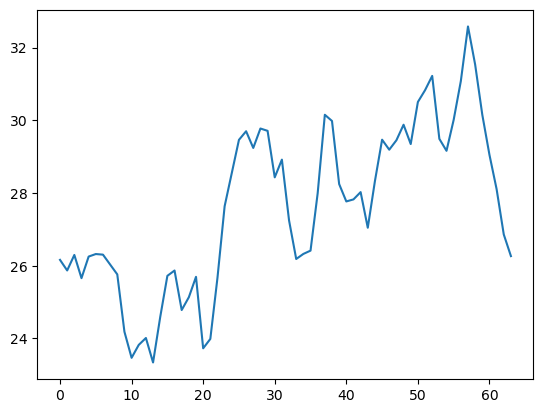

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 64)
y = np.linspace(0, 1, 64)
X, Y = np.meshgrid(x, y)

plt.figure()
plt.contourf(x,y,i['vector'])

plt.figure()
plt.plot(np.linalg.norm(i['vector'], axis = -1))

In [11]:
replay.table.keys()

dict_keys([0rZa3HZz5LGJ3ZxXYBOLVT, 0Rd6cDrB57PGQq7fnHj5ya, 1gzCqEwCEqC1c5uwUEDKTD, 5JoxFmvLJ9d2bsoZeqAmoQ, 4OGAV74yfGb4WN2MCAzdDH, 4d9kYDTFkEmX2VBkuR5xHc, 6NAIEBsRQ62WsAx4Uw6aGV, 4W2yI1yJhlcrmuvc2p6Fxf, 4bOGaoTD3aqN8TZM0wbeef, 5NMw2Jru80DbHc9vV9KdUw, 3A6GFtT7cX6cZvFG3PSnSe, 5q9xMIekuXp5MCBCLewCOM, 3xhnbbDY3U8dJNCBWFuMP6, 01xWkr0TeCMCZQyTaCKFI3, 4wJaUvMkJOWbGuHovm4T25, 7clCAuZtcqSilG7Ry9xNlb, 5uv9b5pgj5Lj2fsitpaJ4e, 14OulhYXZt4DSvtugn2p4O, 3LZ0toc24dYRaCaHkbxj6I, 45pQpD3UgTwVrErbOPebCb, 4qgT2D5AF1Vu99NYn5cKYP, 0W10md3saync9BHlGzawth, 7pMg665ihJ5QN0cXnAXopp, 08f8oo8Tx1usSPXeFoaguj, 0m2D7d4IfQyBtX6OcIo4gi, 4fjuyQC5p8WSML4QSBIg3u, 3UdJmuNGcIuujU3WLDBn0d, 60pB2k4DMKnFnoRS28mHIJ, 3pgexSuK9qChHjOLRIP05y, 5giBsqDogoMui0J9DhFwM0, 4MReWvt3iax04RXrtgXDAo, 3ZMCknGxLaT7ShnXerBXaJ, 5wTao3p04q8J3jgHLyBGf0, 34LR1Jzbiv1eWERVAfPWp1, 37V7d8pdNHy29bHoxHyZ8B, 12XqP77FdSwCWCgpBAbEof, 4gnbxC4rvvjVq0VQNrbwbd, 3JtLcY2SeD099Q20MUxxvs, 1TMvlETa5koNWCuqoKAXPA, 0uOCJWbwwdQfEN0eZrxTkC, 7E3s16bgUrXknKq4X7iwgO, 0unWy